In [1]:
from test_beta_package import *
%matplotlib inline

In [2]:
# general check of the folder structure and assign variables
path_data_folder, path_raw_data_folder, path_process_data_folder, path_top_folder, path_info_dir, path_analysis_dir, \
path_plots_dir, path_single_pred_dir, path_multi_pred_dir = folder_structure()

In [3]:
#load the pickle files and assign dictionary to variables
data_continous_ratemaps, data_binned_glm = \
    processing_and_loading(path_raw_data_folder, path_process_data_folder, 
                           data_continous_ratemaps_pickle="rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl",
                           data_binned_glm_pickle="binned_4_GLM_rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl")


the continous dictionary is dict_keys(['output_file_prefix', 'exist_animal2', 'startaltbins', 'endaltbins', 'settings', 'session_indicator', 'frame_times', 'time_bins', 'framerate', 'overall_framerate', 'session_ts', 'tracking_ts', 'cell_names', 'cell_activities', 'dxs', 'dys', 'animal_location', 'possiblecovariates', 'possiblecovariatesnames', 'possiblecovariatesbounds', 'possiblecovariatesbins'])
the binned dictionary is dict_keys(['framerate', 'settings', 'cell_names', 'spk_mat', 'features_mat'])
the binned dictionary is [0. 0. 0. ... 0. 0. 0.]


In [4]:
# obtain the information and save them for further processing
predictors_name_list, cells_id, animal_name = get_data_information(path_info_dir, data_continous_ratemaps)

In [5]:
# assign values to the model's parameters
dict_param = dict_parameters_hmm(path_info_dir, animal_name, num_dimen=1, num_categ_obs=2, N_iters=500,
                                 tolerance=10**-5, num_indep_neurons=2, num_predictors=5, max_num_states=3,
                                 observation_type="input_driven_obs",
                                 transistion_type="inputdriven", optim_method="em")

In [6]:
# extract the indices and totaltime from spike trains. With this function you select "num_indep_neurons" cells randomly
cell_index, tot_time = cells_selection_manual(path_info_dir, data_continous_ratemaps, data_binned_glm, dict_param, 'cells_selection.csv')


In [7]:
%%capture cap --no-stderr 
# processing of data and creation of instances for the inference
glmhmms_ista, process_neur, inputs_list, T_list, tot_masked_indices_list, path_plots_list, plots_folder = \
    data_structure(path_info_dir, path_analysis_dir, path_single_pred_dir, data_continous_ratemaps, data_binned_glm,
                   dict_param,
                   tot_time, cell_index, predictors_name_list, predictor_file="test_predictors.csv")

In [8]:
# fitting section, where you run the inference
fit_ll_states_list, glmhmms_ista, time_states_comp = inference_section(path_analysis_dir, path_info_dir, dict_param,
                                                                       glmhmms_ista=glmhmms_ista, process_neur=process_neur,
                                                                       inputs_list=inputs_list)

0


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 0 is 77.98656296730042
1


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 1 is 1.7406201362609863
2


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 2 is 2.368715763092041
3


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 3 is 1.9003074169158936
4


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 4 is 2.0628671646118164
0


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 5 is 100.71323442459106
1


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 6 is 1.6011552810668945
2


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 7 is 2.6421866416931152
3


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 8 is 1.947206974029541
4


  0%|          | 0/500 [00:00<?, ?it/s]

computation time loop 9 is 34.11637568473816
The total time for the inference is 227.07923245429993


In [9]:
# post analysis processing. Here you obtain the posterior probabilities list with structure described in the code
posterior_probs_list = posterior_prob_process(path_info_dir, path_analysis_dir, dict_param=dict_param,
                                              glmhmms_ista=glmhmms_ista, process_neur=process_neur,
                                              inputs_list=inputs_list)

the input form is [[array([[10.6933533 ,  1.        ],
       [10.94194185,  1.        ],
       [11.20825033,  1.        ],
       ...,
       [ 0.37459429,  1.        ],
       [ 0.50266247,  1.        ],
       [ 0.64292032,  1.        ]]), array([[10.6933533 ,  1.        ],
       [10.94194185,  1.        ],
       [11.20825033,  1.        ],
       ...,
       [ 0.37459429,  1.        ],
       [ 0.50266247,  1.        ],
       [ 0.64292032,  1.        ]])], [array([[ 7.84533631,  1.        ],
       [ 7.84695203,  1.        ],
       [ 7.85171584,  1.        ],
       ...,
       [11.16635283,  1.        ],
       [11.18234474,  1.        ],
       [11.24178234,  1.        ]]), array([[ 7.84533631,  1.        ],
       [ 7.84695203,  1.        ],
       [ 7.85171584,  1.        ],
       ...,
       [11.16635283,  1.        ],
       [11.18234474,  1.        ],
       [11.24178234,  1.        ]])], [array([[5.62521328, 1.        ],
       [6.05557478, 1.        ],
       [6.2165

In [10]:
# further processing of posterior to get the total occupancy for each state
states_occupancies = states_occupancies_computation(path_analysis_dir, posterior_probs_list)

In [11]:
# Below s a sample of plots

2 5


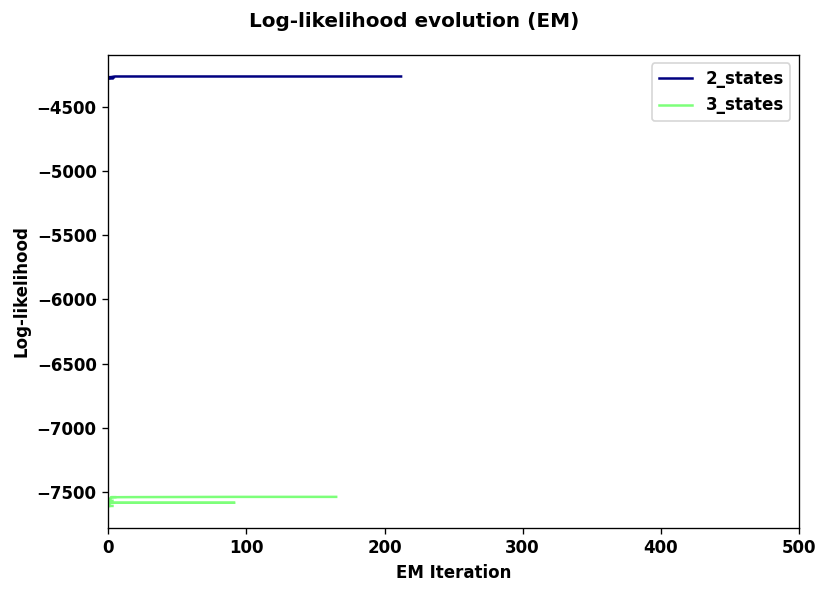

In [12]:
log_like_evolution_per_states(path_analysis_dir, path_info_dir, dict_objects=0, dict_processed_objects=0,
                              dictionary_information=0)

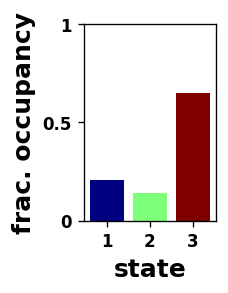

In [13]:
states_occupancies_histogram(path_analysis_dir, path_info_dir, dict_param=dict_param,
                             states_occupancies=states_occupancies)

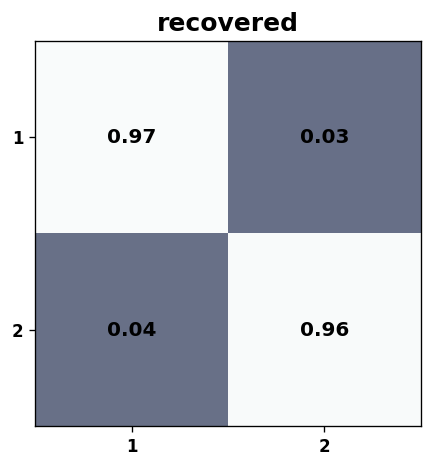

In [14]:
transition_prob_matrix(path_analysis_dir, path_info_dir, glmhmms_ista=glmhmms_ista, dict_param=dict_param)

inferred and transformed weights are {'2_states': [array([[[0.50102407, 0.98887866]],

       [[0.71873997, 0.9798662 ]]]), array([[[0.50264486, 0.9886204 ]],

       [[0.49940101, 0.98936242]]]), array([[[0.49880617, 0.98983049]],

       [[0.50082596, 0.98821566]]]), array([[[0.50249918, 0.989784  ]],

       [[0.50322298, 0.98901824]]]), array([[[0.50021266, 0.98887416]],

       [[0.49982274, 0.98960172]]])], '3_states': [array([[[0.4980599 , 0.9842879 ]],

       [[0.58745803, 0.97579658]]]), array([[[0.52731665, 0.94960797]],

       [[0.53258053, 0.94367279]]]), array([[[0.50493123, 0.97440138]],

       [[0.49714666, 0.97638109]]]), array([[[0.50005661, 0.97839185]],

       [[0.49988351, 0.97896326]]]), array([[[0.50029286, 0.97984601]],

       [[0.4995547 , 0.98010563]]])]}


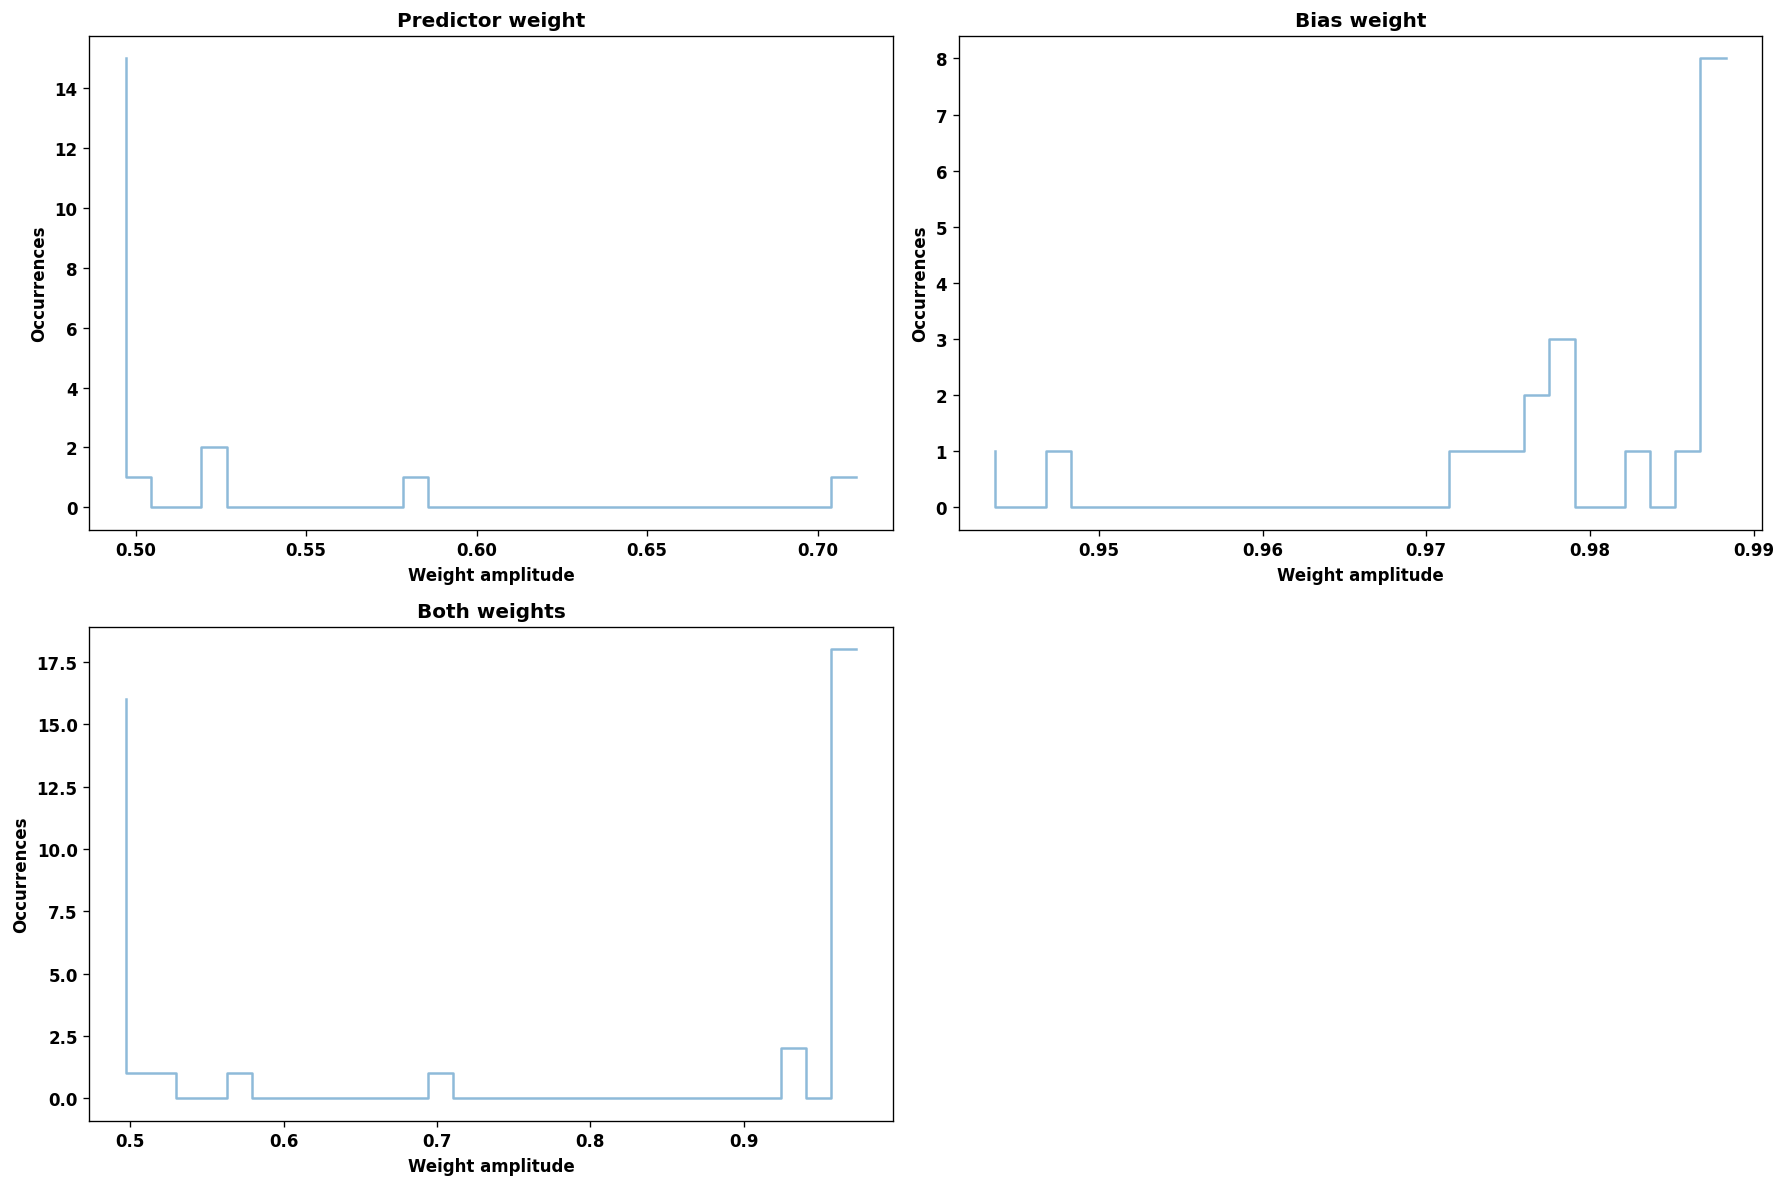

In [15]:
weights_distribution_histogram(path_analysis_dir, path_info_dir)